In [1]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.drift_detection.adwin import ADWIN

from float.feature_selection import FIRES           # online feature methods
from skmultiflow.data import FileStream             # create stream from file
from sklearn.model_selection import ParameterGrid   # hyperparameter combinations

from prequential import run_prequential

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_loader = FileStream(filepath='../merged.csv')

In [10]:
for index, name in enumerate(data_loader.feature_names):
    print(index, name)

0 dst_port
1 dst_asn
2 quic_ver
3 dur
4 ratio
5 flow_pkt_rate
6 flow_byte_rate
7 total_pkts
8 total_bytes
9 max_bytes
10 min_bytes
11 ave_bytes
12 std_bytes
13 var_bytes
14 fwd_pkts
15 fwd_bytes
16 max_fwd_bytes
17 min_fwd_bytes
18 ave_fwd_bytes
19 std_fwd_bytes
20 var_fwd_bytes
21 rev_pkts
22 rev_bytes
23 max_rev_bytes
24 min_rev_bytes
25 ave_rev_bytes
26 std_rev_bytes
27 var_rev_bytes
28 max_iat
29 min_iat
30 ave_iat
31 std_iat
32 var_iat
33 fwd_dur
34 max_fwd_iat
35 min_fwd_iat
36 ave_fwd_iat
37 std_fwd_iat
38 var_fwd_iat
39 rev_dur
40 max_rev_iat
41 min_rev_iat
42 ave_rev_iat
43 std_rev_iat
44 var_rev_iat


In [3]:
ref_sample, _ = data_loader.next_sample(50)
data_loader.reset()

In [4]:
parameters = {
    'penalty_s': [0.00001, 0.0001, 0.001, 0.01, 0.1],    # default=0.01
    'penalty_r': [0.01, 0.1, 1],                # default=0.01
    'lr_mu': [1],         # default=0.01
    'lr_sigma': [0.01, 0.025, 0.1],      # default=0.01    
}

fires_grid = ParameterGrid(parameters)

In [5]:
# warm up run before memory measurement

run_prequential(
    classifier=AdaptiveRandomForestClassifier(),
    stream=data_loader,
    feature_selector = FIRES(
        n_total_features=data_loader.n_features,
        n_selected_features=10,
        classes=data_loader.target_values,
        baseline='gaussian',
        ref_sample=ref_sample
    ),
    preq_samples=10
)

(1.0,
 0.0,
 0.0,
 0.0,
 0.006622660000000025,
 [[20, 13, 27, 1, 8, 15, 6, 9, 16, 22],
  [20, 13, 27, 6, 1, 8, 22, 15, 9, 16],
  [20, 13, 27, 6, 8, 1, 22, 15, 9, 16],
  [13, 20, 27, 6, 8, 1, 22, 15, 9, 16],
  [13, 20, 27, 6, 8, 22, 1, 15, 9, 16],
  [13, 20, 27, 6, 8, 22, 1, 15, 9, 23],
  [13, 20, 6, 27, 8, 22, 1, 15, 9, 23],
  [13, 6, 20, 27, 8, 22, 1, 15, 9, 23],
  [6, 13, 20, 27, 8, 22, 1, 15, 9, 23],
  [6, 13, 20, 27, 8, 22, 1, 15, 9, 23]])

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.01, 'penalty_s': 1e-05}
Accuracy: 0.998771, Precision: 0.998760, Recall: 0.998700, F1: 0.998730
Average processing time: 0.007295198170645155


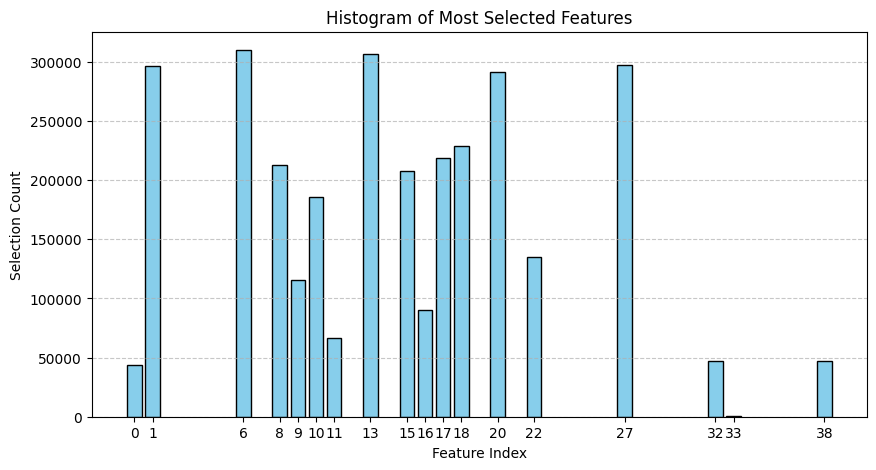

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.01, 'penalty_s': 0.0001}
Accuracy: 0.998619, Precision: 0.998540, Recall: 0.998607, F1: 0.998573
Average processing time: 0.006995608712580579


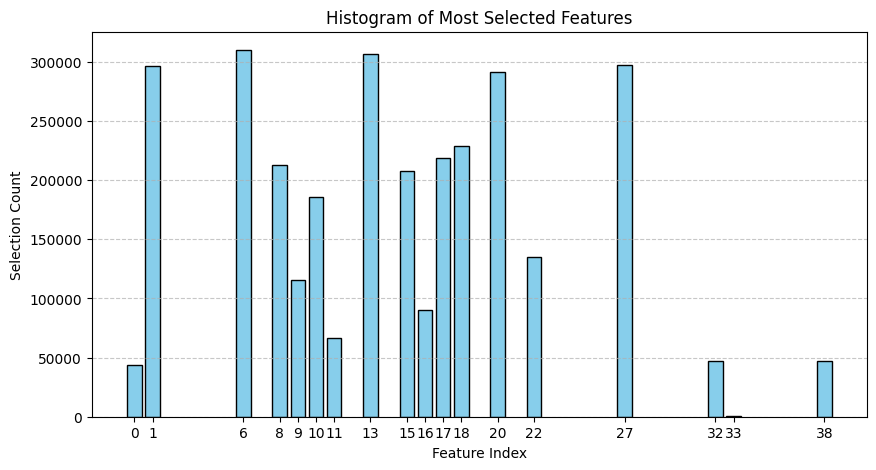

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.01, 'penalty_s': 0.001}
Accuracy: 0.998700, Precision: 0.998653, Recall: 0.998660, F1: 0.998657
Average processing time: 0.006962378837743272


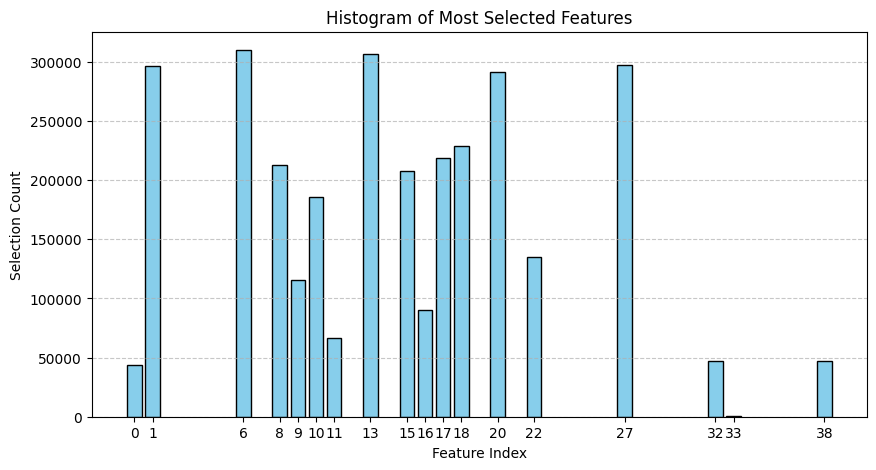

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.01, 'penalty_s': 0.01}
Accuracy: 0.998658, Precision: 0.998660, Recall: 0.998567, F1: 0.998613
Average processing time: 0.006964498317417597


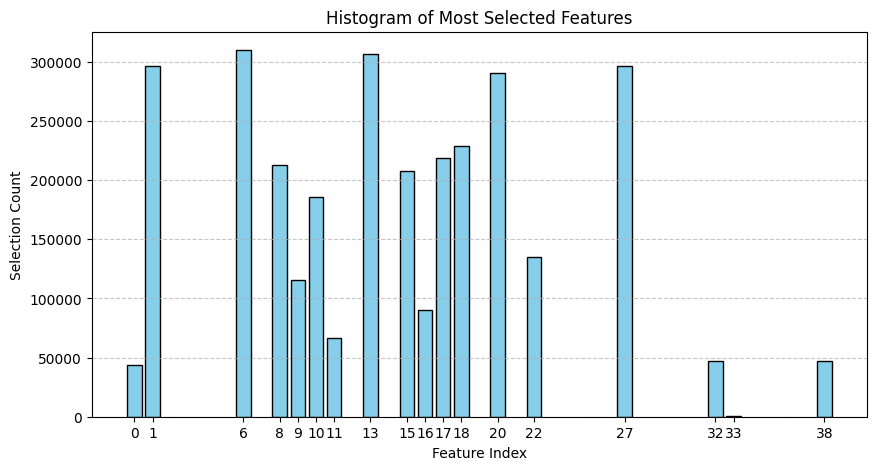

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.01, 'penalty_s': 0.1}
Accuracy: 0.998658, Precision: 0.998607, Recall: 0.998620, F1: 0.998613
Average processing time: 0.007075143894838062


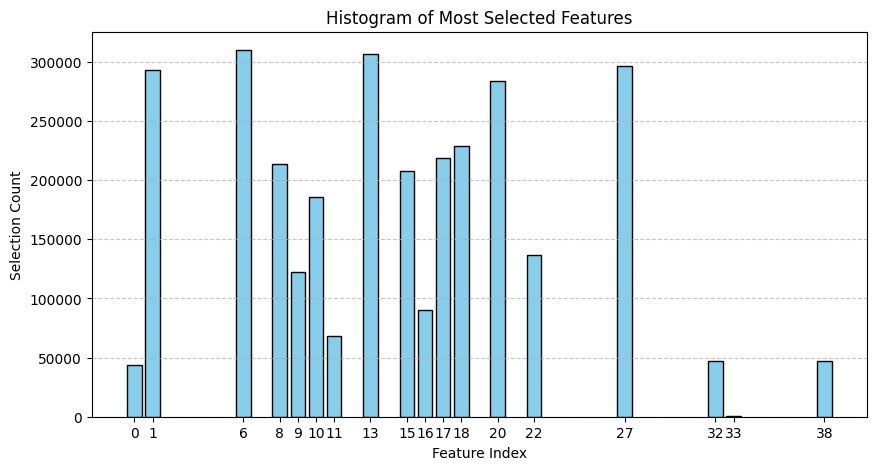

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.1, 'penalty_s': 1e-05}
Accuracy: 0.998706, Precision: 0.998667, Recall: 0.998660, F1: 0.998663
Average processing time: 0.007029159135805633


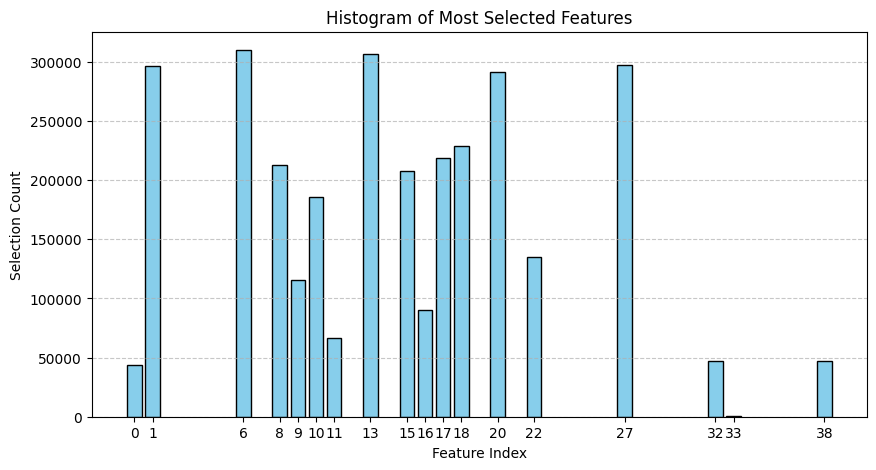

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.1, 'penalty_s': 0.0001}
Accuracy: 0.998648, Precision: 0.998627, Recall: 0.998580, F1: 0.998603
Average processing time: 0.007144704405484229


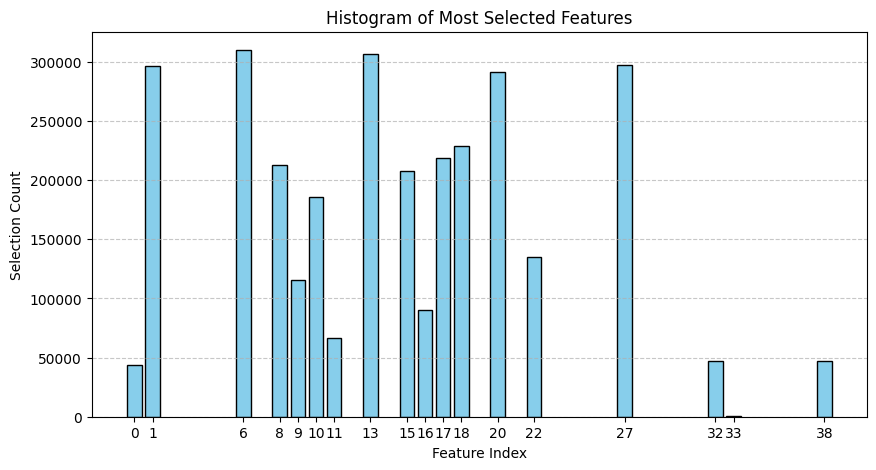

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.1, 'penalty_s': 0.001}
Accuracy: 0.998600, Precision: 0.998500, Recall: 0.998607, F1: 0.998553
Average processing time: 0.0070072085070965314


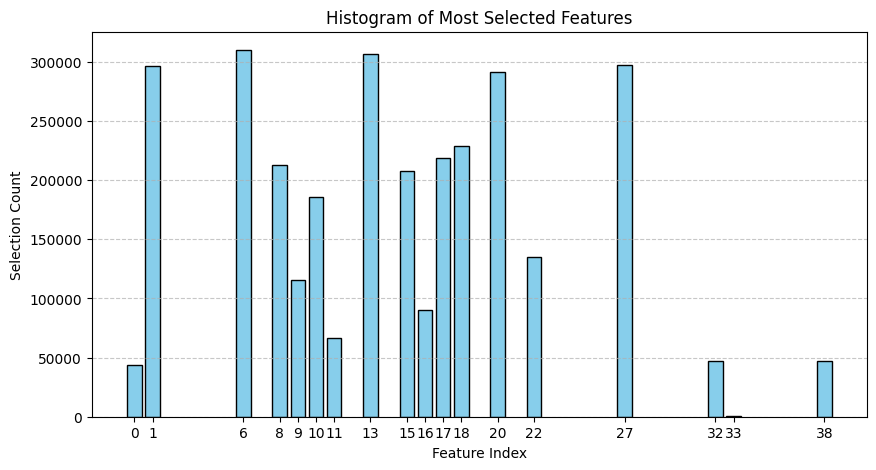

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.1, 'penalty_s': 0.01}
Accuracy: 0.998668, Precision: 0.998693, Recall: 0.998553, F1: 0.998623
Average processing time: 0.0069524290496766035


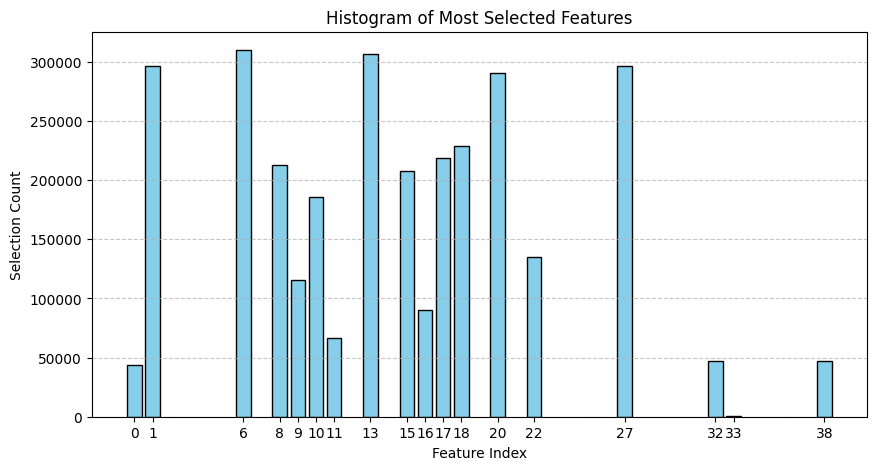

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 0.1, 'penalty_s': 0.1}
Accuracy: 0.998681, Precision: 0.998627, Recall: 0.998647, F1: 0.998637
Average processing time: 0.00696180825806413


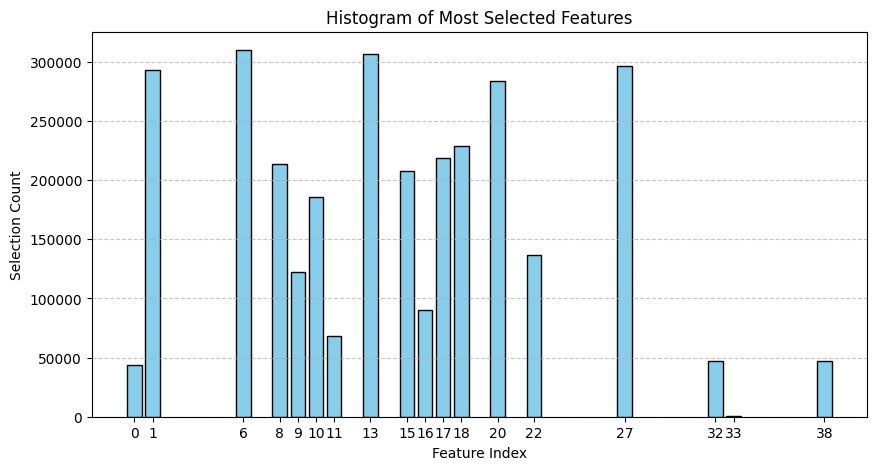

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 1, 'penalty_s': 1e-05}
Accuracy: 0.998623, Precision: 0.998673, Recall: 0.998480, F1: 0.998577
Average processing time: 0.006938504030969911


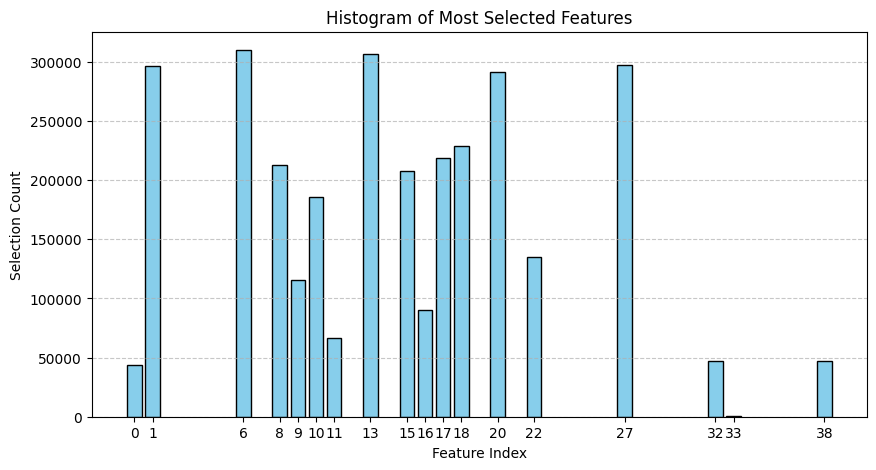

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 1, 'penalty_s': 0.0001}
Accuracy: 0.998632, Precision: 0.998620, Recall: 0.998553, F1: 0.998587
Average processing time: 0.006918174955481053


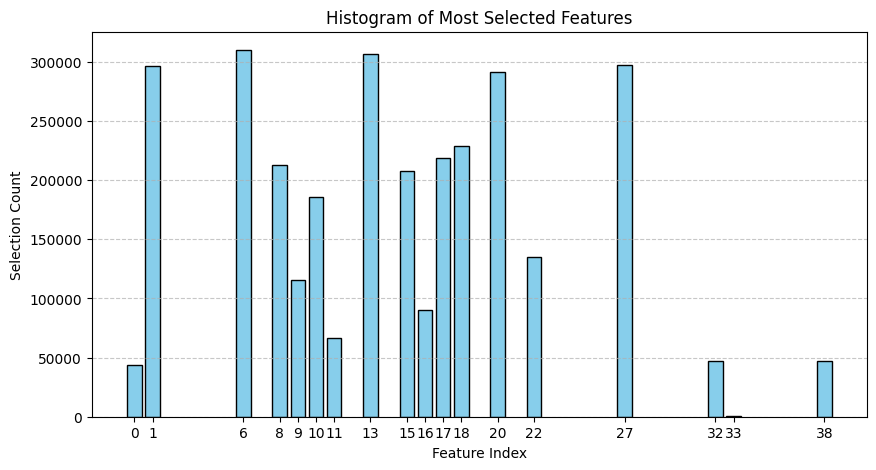

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 1, 'penalty_s': 0.001}
Accuracy: 0.998719, Precision: 0.998640, Recall: 0.998713, F1: 0.998677
Average processing time: 0.006921533973548057


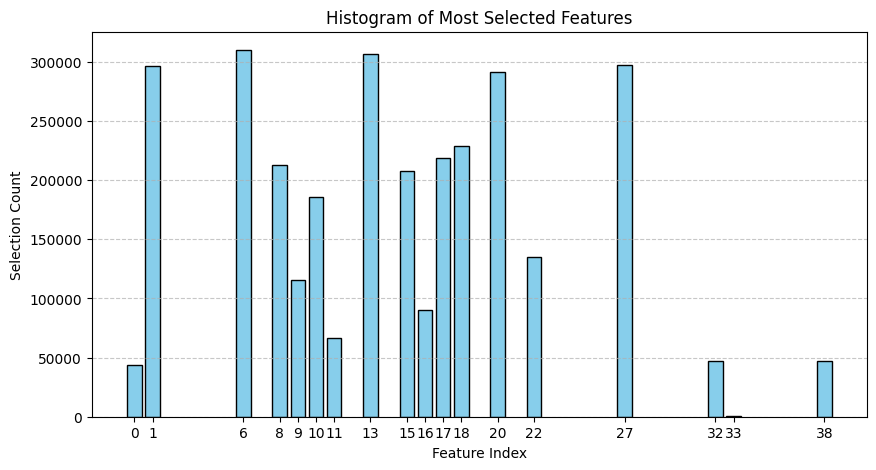

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 1, 'penalty_s': 0.01}
Accuracy: 0.998665, Precision: 0.998607, Recall: 0.998633, F1: 0.998620
Average processing time: 0.006932705628063019


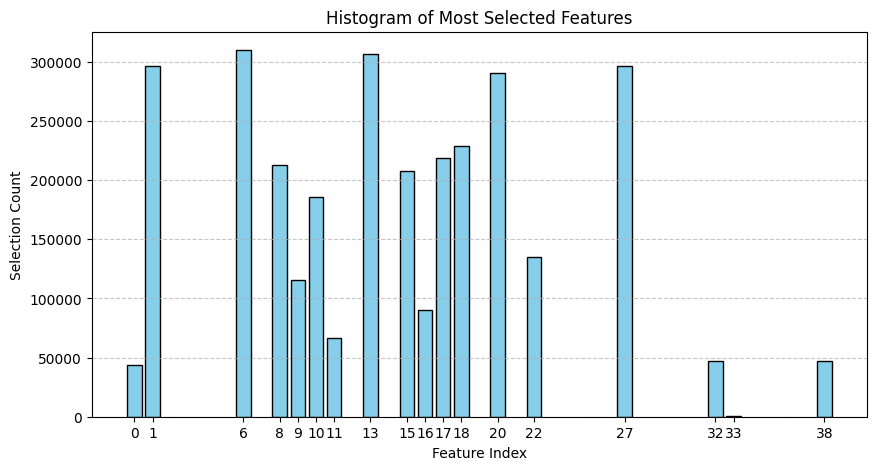

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.01, 'penalty_r': 1, 'penalty_s': 0.1}
Accuracy: 0.998768, Precision: 0.998707, Recall: 0.998747, F1: 0.998727
Average processing time: 0.006956583564189467


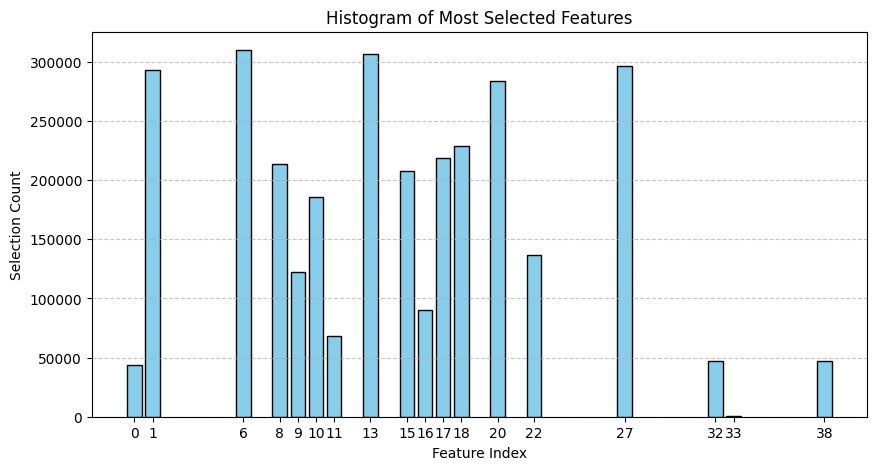

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.01, 'penalty_s': 1e-05}
Accuracy: 0.998668, Precision: 0.998706, Recall: 0.998540, F1: 0.998623
Average processing time: 0.006946279604518701


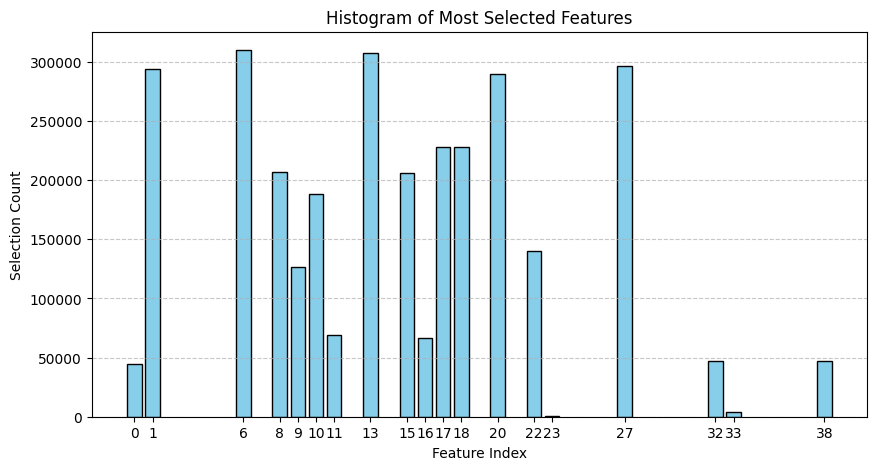

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.01, 'penalty_s': 0.0001}
Accuracy: 0.998668, Precision: 0.998647, Recall: 0.998600, F1: 0.998623
Average processing time: 0.006930859015482941


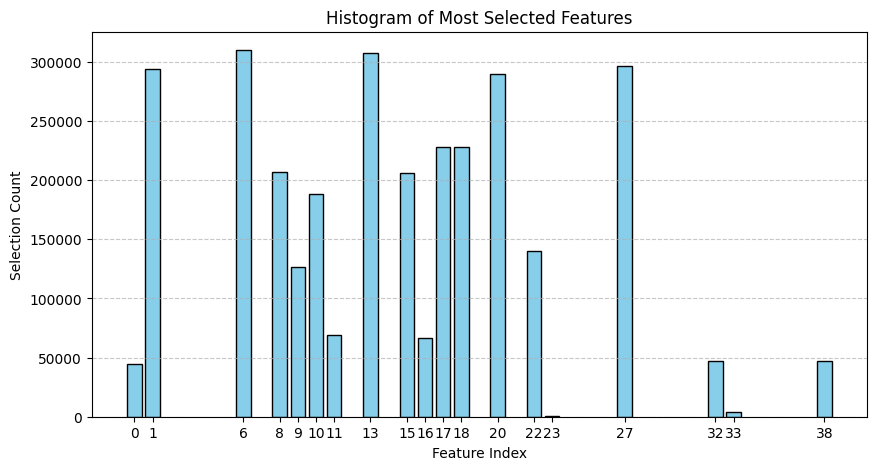

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.01, 'penalty_s': 0.001}
Accuracy: 0.998661, Precision: 0.998667, Recall: 0.998567, F1: 0.998617
Average processing time: 0.006906365331597631


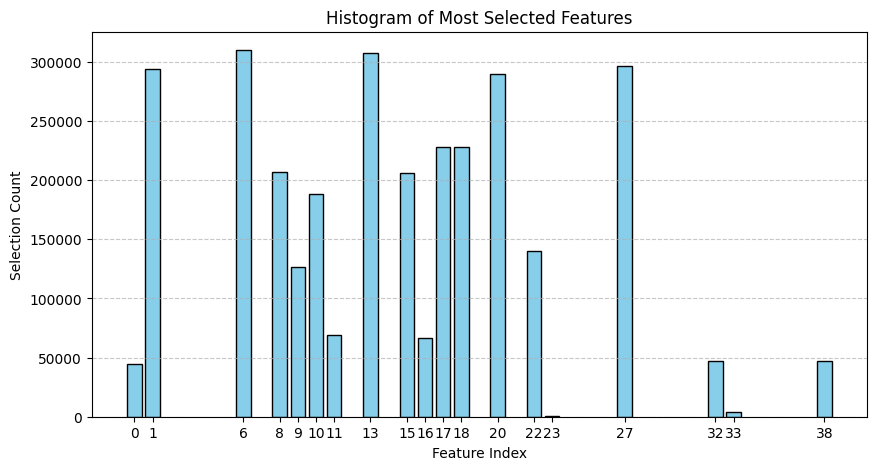

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.01, 'penalty_s': 0.01}
Accuracy: 0.998748, Precision: 0.998680, Recall: 0.998733, F1: 0.998707
Average processing time: 0.006943071147106046


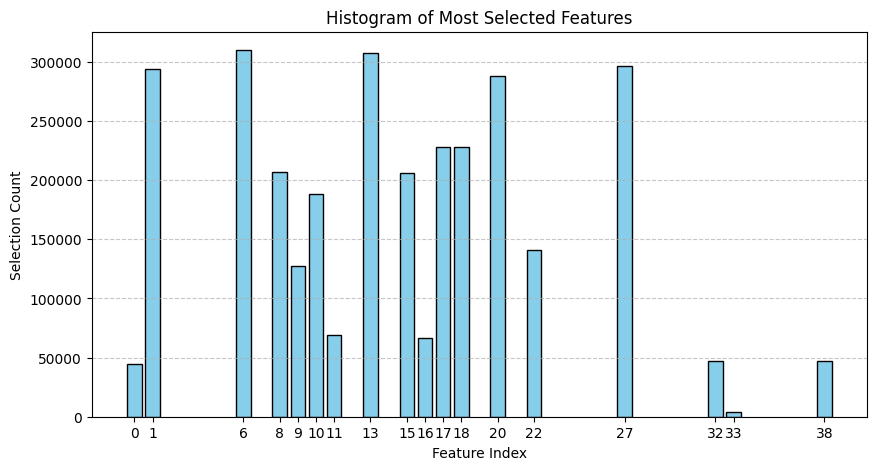

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.01, 'penalty_s': 0.1}
Accuracy: 0.998658, Precision: 0.998573, Recall: 0.998653, F1: 0.998613
Average processing time: 0.006900043248065894


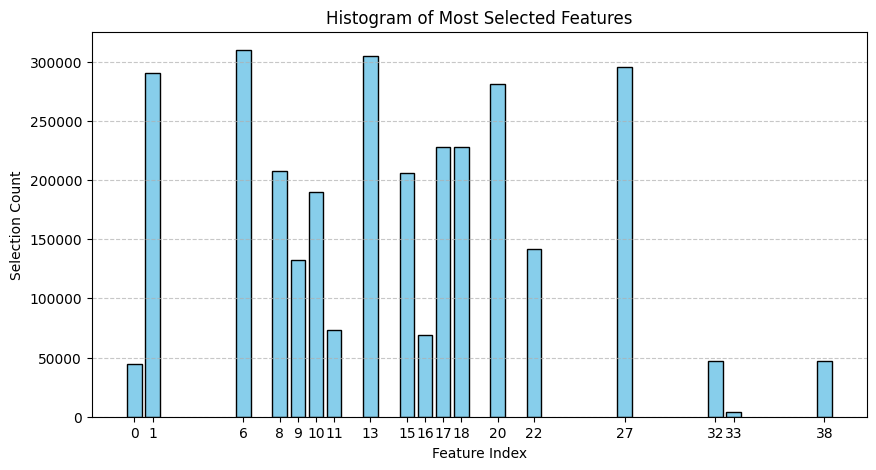

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.1, 'penalty_s': 1e-05}
Accuracy: 0.998694, Precision: 0.998753, Recall: 0.998547, F1: 0.998650
Average processing time: 0.00695262180870066


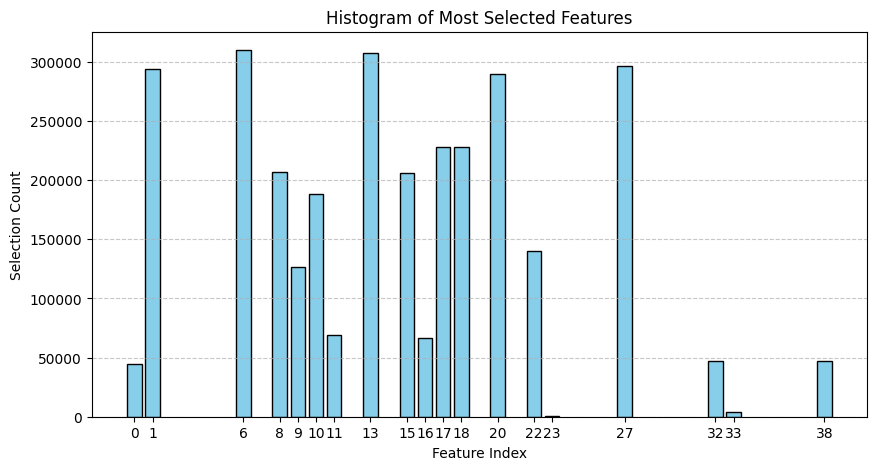

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.1, 'penalty_s': 0.0001}
Accuracy: 0.998684, Precision: 0.998673, Recall: 0.998607, F1: 0.998640
Average processing time: 0.00692070839258562


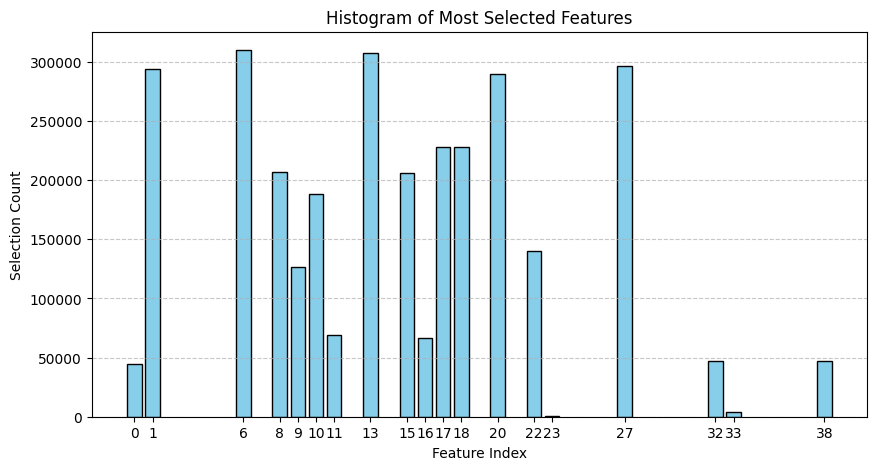

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.1, 'penalty_s': 0.001}
Accuracy: 0.998629, Precision: 0.998693, Recall: 0.998473, F1: 0.998583
Average processing time: 0.006942955452258508


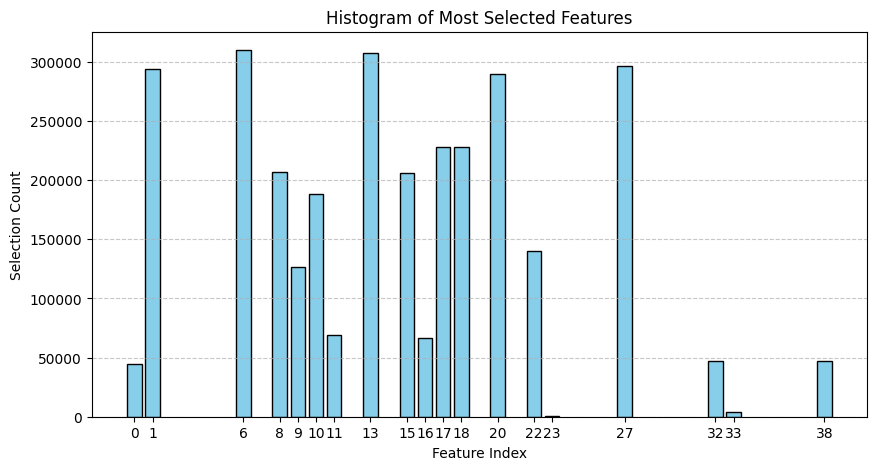

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.1, 'penalty_s': 0.01}
Accuracy: 0.998661, Precision: 0.998627, Recall: 0.998607, F1: 0.998617
Average processing time: 0.006957344234192879


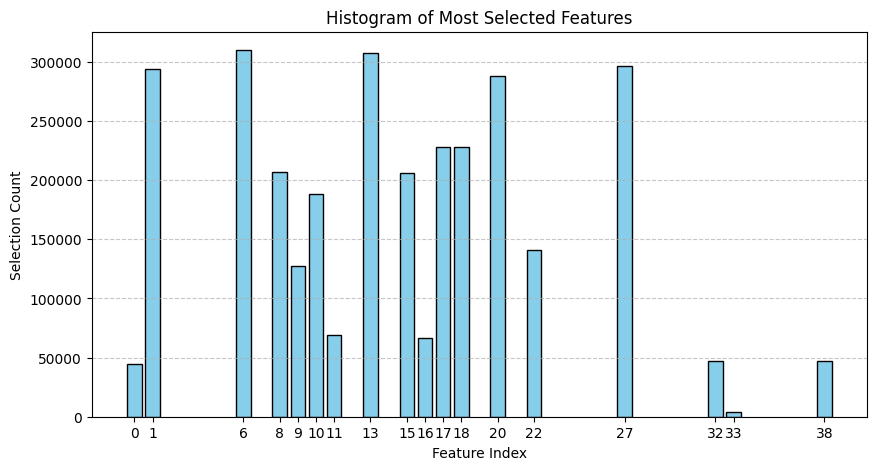

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 0.1, 'penalty_s': 0.1}
Accuracy: 0.998739, Precision: 0.998766, Recall: 0.998627, F1: 0.998697
Average processing time: 0.006917891983873391


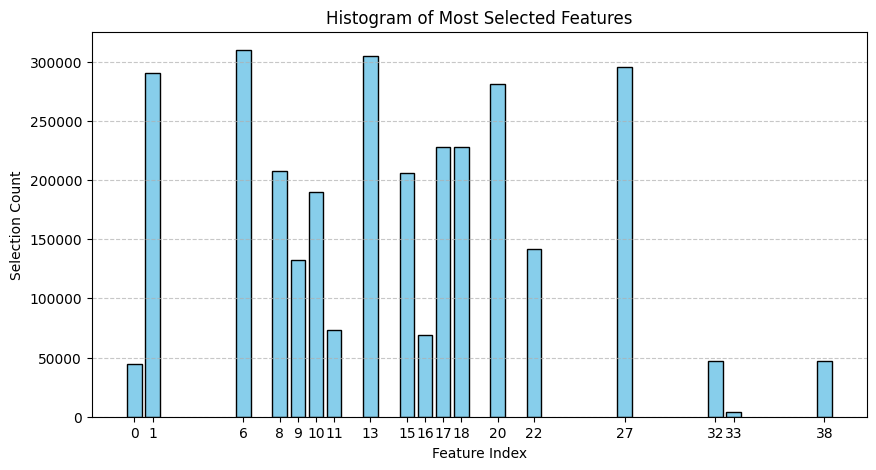

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 1, 'penalty_s': 1e-05}
Accuracy: 0.998526, Precision: 0.998606, Recall: 0.998347, F1: 0.998476
Average processing time: 0.006942526066133418


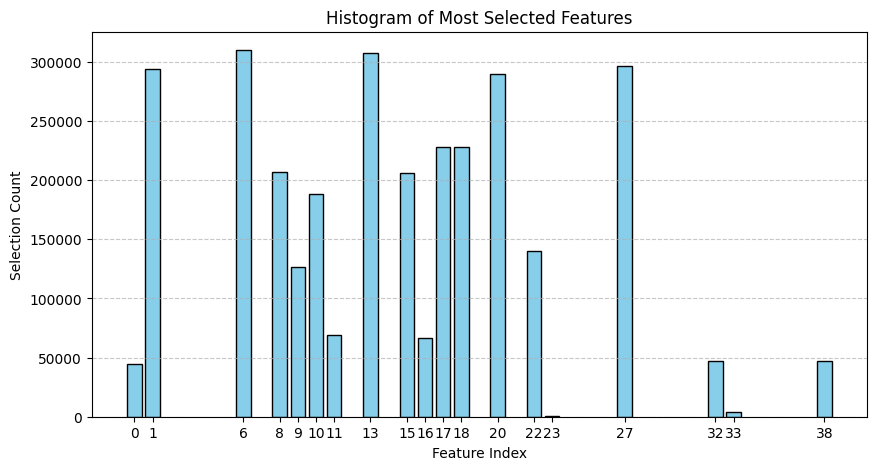

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 1, 'penalty_s': 0.0001}
Accuracy: 0.998745, Precision: 0.998780, Recall: 0.998627, F1: 0.998703
Average processing time: 0.006952197567422545


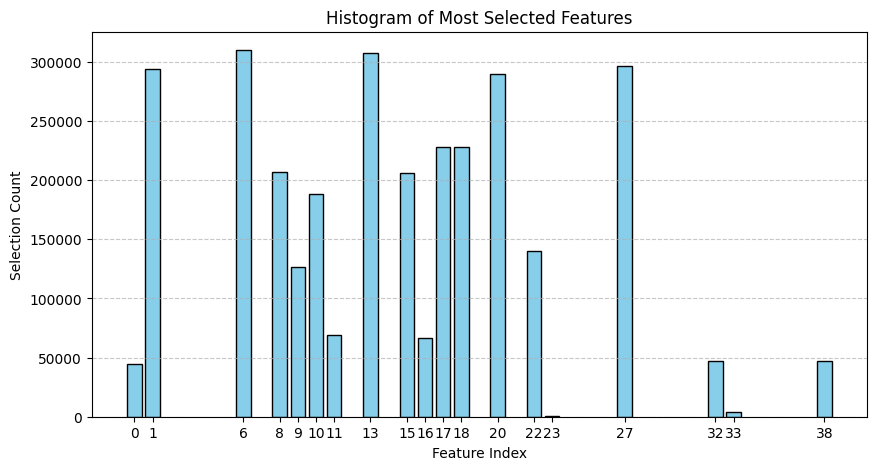

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 1, 'penalty_s': 0.001}
Accuracy: 0.998655, Precision: 0.998667, Recall: 0.998553, F1: 0.998610
Average processing time: 0.006948794254833117


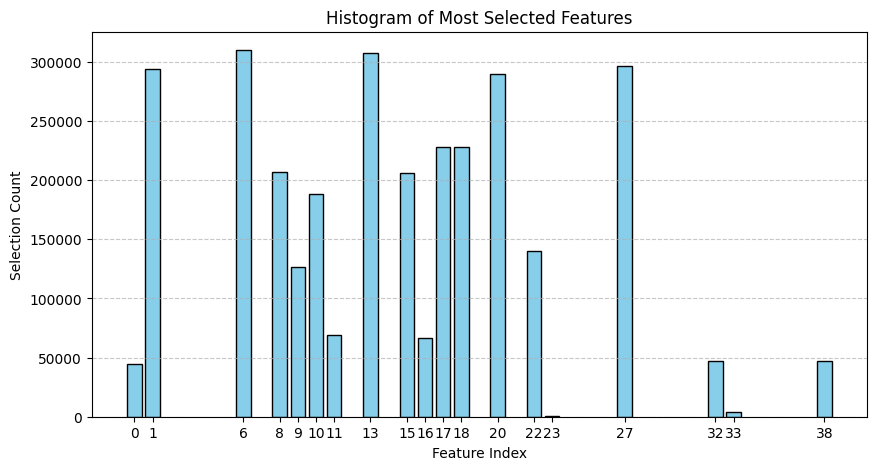

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 1, 'penalty_s': 0.01}
Accuracy: 0.998681, Precision: 0.998653, Recall: 0.998620, F1: 0.998637
Average processing time: 0.0069274071061359846


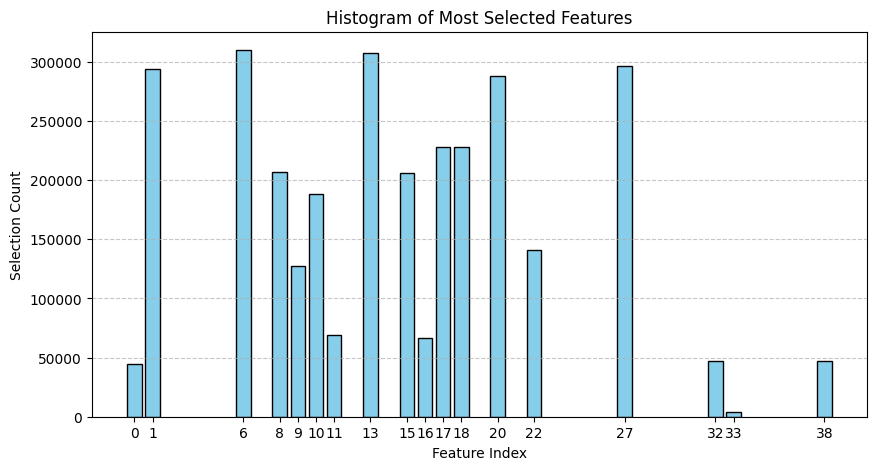

Evaluating parameters: {'lr_mu': 1, 'lr_sigma': 0.025, 'penalty_r': 1, 'penalty_s': 0.1}


In [ ]:
best_params = None
best_score = 0
best_metrics = []

results = []

for params in fires_grid:
    print(f"Evaluating parameters: {params}")
    data_loader.restart()

    # tracemalloc.start()

    accuracy, precision, recall, f1, avg_processing_time, sel_history = run_prequential(
        classifier=AdaptiveRandomForestClassifier(),
        stream=data_loader,
        feature_selector = FIRES(
                **params,
                n_total_features=data_loader.n_features,
                n_selected_features=10,
                classes=data_loader.target_values,
                baseline='gaussian',
                ref_sample=ref_sample
        ),
        preq_samples=380000
    )

    # current_mem, peak_mem = tracemalloc.get_traced_memory()
    # tracemalloc.stop()

    print(f"Accuracy: {accuracy:.6f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1: {f1:.6f}")
    print(f"Average processing time: {avg_processing_time}")
    # print(f"Current memory usage (KB): {current_mem / 1024}")
    # print(f"Peak memory usage (KB): {peak_mem / 1024}")

    avg_score = (accuracy + precision + recall + f1) / 4

    if avg_score > best_score:
        best_params = params
        best_score = avg_score
        best_metrics = [accuracy, precision, recall, f1]
    
    results.append({
        **params,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'avg_score': avg_score,
        'avg_processing_time': avg_processing_time
    })

    # feature selection histogram
    feature_counts = Counter([feature for selection in sel_history for feature in selection])

    # Extract feature indices and their counts
    features, counts = zip(*feature_counts.items())
    plt.figure(figsize=(10, 5))
    plt.bar(features, counts, color='skyblue', edgecolor='black')
    plt.xlabel("Feature Index")
    plt.ylabel("Selection Count")
    plt.title("Histogram of Most Selected Features")
    plt.xticks(features)  # Ensure all feature indices are shown
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

print("Grid Search Completed.")
print(f"Best Parameters: {best_params}")
print(f"Best Metrics: {best_metrics}")

In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv("fires-tuning.csv", index=False)